In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from __future__ import absolute_import

In [4]:
import data_preparing as dp

In [5]:
# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [6]:
mpl.style.use('classic')

In [7]:
part_size = 450

dataset = np.vstack([
    np.hstack([dp.get_normal_distributed_features(2,5,6,10, part_size), np.full((part_size,1),0)]),
    np.hstack([dp.get_normal_distributed_features(4,8,2,7,  part_size), np.full((part_size,1),1)]),
])

In [8]:
nnmodel = dp.NNmodel()
nnmodel.learn(dataset[:,:2], dataset[:,2]);

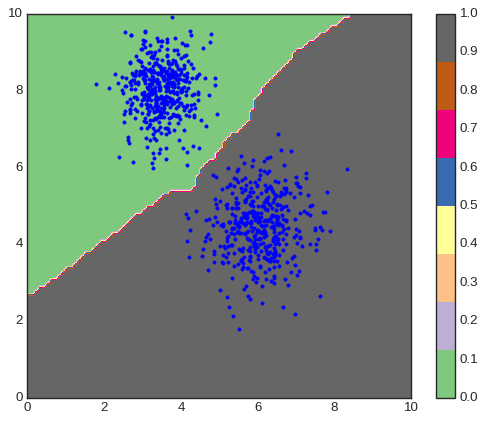

In [14]:
plt.style.use('seaborn-white')

np.random.seed(0)

size = 100

x = np.linspace(0, 10, size)
y = np.linspace(0, 10, size)

# Формируем координатную сетку
X, Y = np.meshgrid(x, y)

Xi = X.reshape(size**2)
Yi = Y.reshape(size**2)

Zi = nnmodel.getclassof(Xi, Yi)

Z = Zi.reshape((size,size))
   
plt.imshow(Z, 
           extent=[0, 10, 0, 10],
           origin='lower', 
           cmap=plt.cm.Accent);

# plt.contour(X,Y,Z, 2)
plt.plot(dataset[:,0], dataset[:,1], ".")
plt.colorbar();
plt.show();

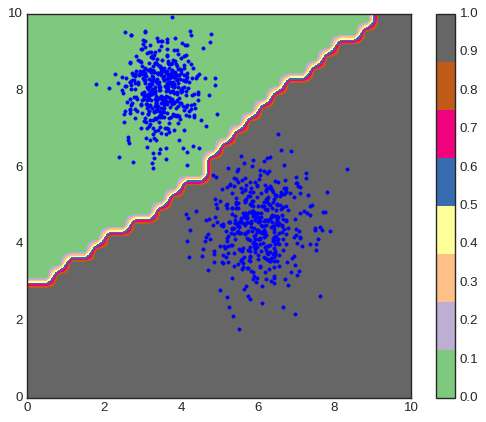

In [16]:
plt.style.use('seaborn-white')

knnmodel = dp.KNNmodel(10)
knnmodel.learn(dataset[:,:2], dataset[:,2]);

size = 30

x = np.linspace(0, 10, size)
y = np.linspace(0, 10, size)

# Формируем координатную сетку
X, Y = np.meshgrid(x, y)

Xi = X.reshape(size**2)
Yi = Y.reshape(size**2)

Zi = knnmodel.getclassof(Xi, Yi)

Z = Zi.reshape((size,size))

plt.imshow(Z, 
           extent=[0, 10, 0, 10],
           origin='lower',
           cmap=plt.cm.Accent);

# plt.contour(X,Y,Z, 2)
plt.plot(dataset[:,0], dataset[:,1], ".")
plt.colorbar();
plt.show();